In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('fake_reg.csv')

In [5]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


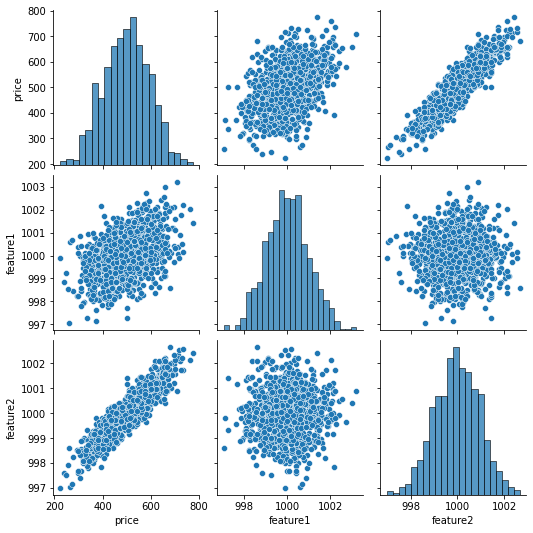

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1','feature2']].values # retourne tableau numpy

In [9]:
y = df['price'].values 

In [10]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [11]:
#repartition entrainement test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
#normailisation 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)#calcul des parametre pour mettre a l'echelle


MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train  = scaler.transform(X_train)

In [16]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [19]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss= 'mse')

In [20]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [21]:
model.fit(X_train, y = y_train, epochs=300)

Epoch 1/300
22/22 [==============================] - 1s 1ms/step - loss: 261774.5822
Epoch 2/300
22/22 [==============================] - 0s 1ms/step - loss: 254716.8811
Epoch 3/300
22/22 [==============================] - 0s 1ms/step - loss: 253915.1080
Epoch 4/300
22/22 [==============================] - 0s 1ms/step - loss: 257784.7914
Epoch 5/300
22/22 [==============================] - 0s 1ms/step - loss: 257788.3655
Epoch 6/300
22/22 [==============================] - 0s 1ms/step - loss: 254393.6005
Epoch 7/300
22/22 [==============================] - 0s 2ms/step - loss: 259492.7181
Epoch 8/300
22/22 [==============================] - 0s 1ms/step - loss: 257260.6427
Epoch 9/300
22/22 [==============================] - 0s 1ms/step - loss: 256497.8961
Epoch 10/300
22/22 [==============================] - 0s 1ms/step - loss: 257000.5543
Epoch 11/300
22/22 [==============================] - 0s 1ms/step - loss: 253360.3519
Epoch 12/300
22/22 [==============================] - 0s 1ms/st

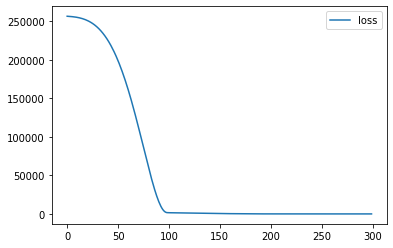

In [22]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [23]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 31.2417


31.241708755493164

In [24]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 983us/step - loss: 27.9562


27.956228256225586

In [25]:
test_prediction = model.predict(X_test)

pred_df = pd.DataFrame(y_test, columns=['Test y'])
pred_df

,Test y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [26]:
test_prediction

array([[407.20566],
       [626.4648 ],
       [594.92914],
       [574.874  ],
       [368.27722],
       [581.88794],
       [517.4018 ],
       [461.30258],
       [551.7882 ],
       [449.66724],
       [614.6585 ],
       [551.60175],
       [421.07394],
       [410.7845 ],
       [654.3748 ],
       [439.3849 ],
       [510.90866],
       [662.9598 ],
       [665.6613 ],
       [568.225  ],
       [335.77585],
       [446.92807],
       [384.3083 ],
       [380.5518 ],
       [569.25183],
       [613.41766],
       [534.8833 ],
       [429.88797],
       [658.4719 ],
       [416.06827],
       [444.75452],
       [487.4136 ],
       [440.4895 ],
       [685.0087 ],
       [426.81396],
       [419.62738],
       [504.37225],
       [553.0693 ],
       [512.0737 ],
       [397.1548 ],
       [621.51074],
       [418.61935],
       [607.3006 ],
       [448.1185 ],
       [504.3511 ],
       [584.53125],
       [672.1983 ],
       [492.74252],
       [320.12897],
       [487.70688],


In [27]:
test_prediction.shape


(300, 1)

In [28]:
test_prediction = pd.Series(test_prediction.reshape(300,))


In [29]:
test_prediction

0      407.205658
1      626.464783
2      594.929138
3      574.874023
4      368.277222
          ...    
295    531.498962
296    517.631409
297    612.521240
298    418.960876
299    412.788330
Length: 300, dtype: float32

In [30]:
pred_df


,Test y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [31]:
pred_df = pd.concat([pred_df, test_prediction], axis = 1)

In [32]:
pred_df.columns = ['Test Y','Model Prediction']

In [33]:
pred_df

,Test Y,Model Prediction
0,402.296319,407.205658
1,624.156198,626.464783
2,582.455066,594.929138
3,578.588606,574.874023
4,371.224104,368.277222
...,...,...
295,525.704657,531.498962
296,502.909473,517.631409
297,612.727910,612.521240
298,417.569725,418.960876


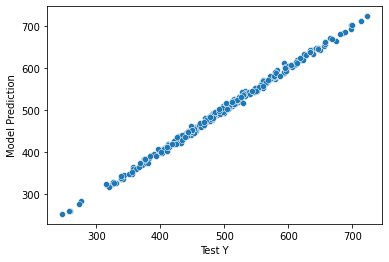

In [34]:
sns.scatterplot(x='Test Y', y = 'Model Prediction', data = pred_df)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(pred_df['Test Y'], pred_df['Model Prediction'])

4.546121155753845

In [37]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Prediction'])**0.5

5.589428436096035

In [43]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [38]:
new_gem = [[998,1000]]

In [39]:
new_gem = scaler.transform(new_gem)

In [40]:
model.predict(new_gem)

array([[421.59808]], dtype=float32)

In [41]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')

In [42]:
later_model = load_model('my_model.h5')